# Data Collection and Preprocessing

In [1]:
import pandas as pd
import numpy as np
import os
import utilities as utils
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances;
%matplotlib widget


In [2]:
labels = []
cgr_mats = []
#cgr_flattened = []
for dir1 in [dir for dir in os.listdir('dataset') if not dir.startswith('.')]:
    for file in os.listdir(os.path.join('dataset', dir1, dir1)):
        path_to_file = os.path.join('dataset',dir1,dir1,file)
        sequence = utils.read_sequence(path_to_file)
        
        tmp = utils.cgr(sequence, 'ACGT', 7)
        cgr_mats.append(tmp)
        labels.append(path_to_file.split('/')[1])
        #cgr_flattened.append(tmp.flatten())

In [3]:
new_cgrs = []
new_labs = []
for lab in np.unique(labels):
    idxs = np.where(np.array(labels) == lab)[0]
    new_labs.append(lab)
    new_cgrs.append(np.sum(np.array(cgr_mats)[idxs], axis=0))
vector_cgrs = [mat.flatten() for mat in new_cgrs]
print(np.array(new_cgrs).shape)

(11, 128, 128)


In [4]:
np.array(new_cgrs).shape

(11, 128, 128)

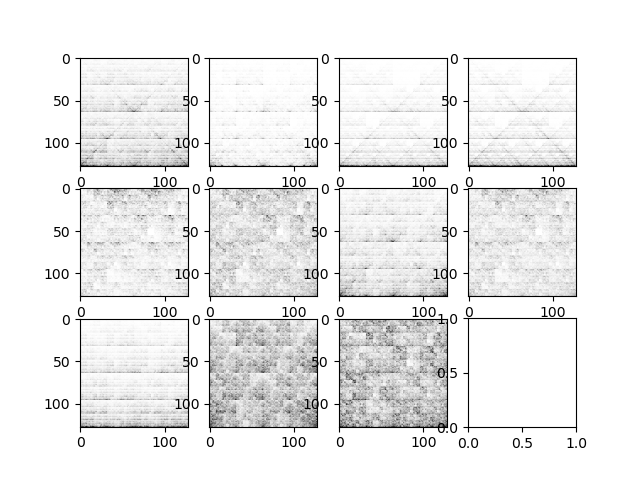

In [5]:
fig,ax = plt.subplots(3,4)
for ax,cgr in zip(ax.flatten(), new_cgrs):
    ax.imshow(cgr, cmap='gray_r')
plt.show()


In [19]:
D = pairwise_distances(vector_cgrs, metric='correlation')

In [7]:
np.all(np.diag(D) == 0)

True

In [8]:
np.all(D == D.T)

True

In [23]:
reduced = utils.perform_mds(D, 3, 42)

In [24]:
reduced.shape
import importlib
importlib.reload(utils)

<module 'utilities' from '/Users/zeyadahmed/Documents/UPEI/2024W/CS4440/Project/Bacteria-Classification-ML/utilities.py'>

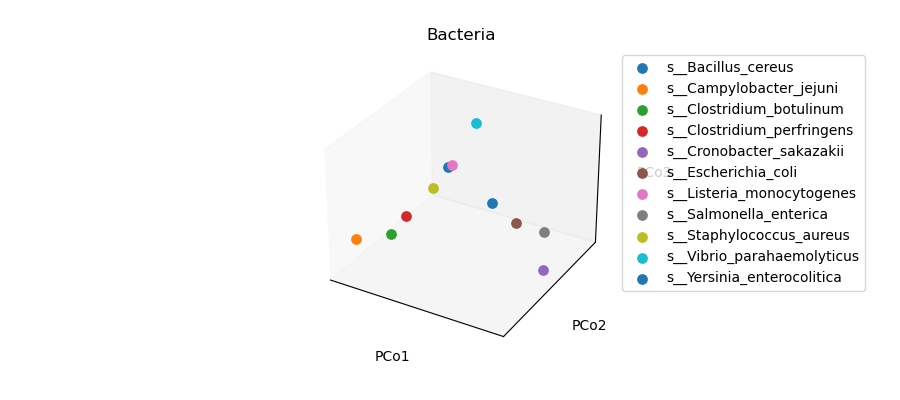

In [25]:
utils.plot_3d(reduced, new_labs)

In [ ]:
np.unique(labels, return_counts=True)

(array(['s__Bacillus_cereus', 's__Campylobacter_jejuni',
        's__Clostridium_botulinum', 's__Clostridium_perfringens',
        's__Cronobacter_sakazakii', 's__Escherichia_coli',
        's__Listeria_monocytogenes', 's__Salmonella_enterica',
        's__Staphylococcus_aureus', 's__Vibrio_parahaemolyticus',
        's__Yersinia_enterocolitica'], dtype='<U26'),
 array([ 2,  1, 28,  1,  4,  2,  1,  2,  2,  5,  1]))

In [ ]:
labels[0]

In [ ]:
plt.close()